Mean Squared Error: 154.67
Root Mean Squared Error: 12.44


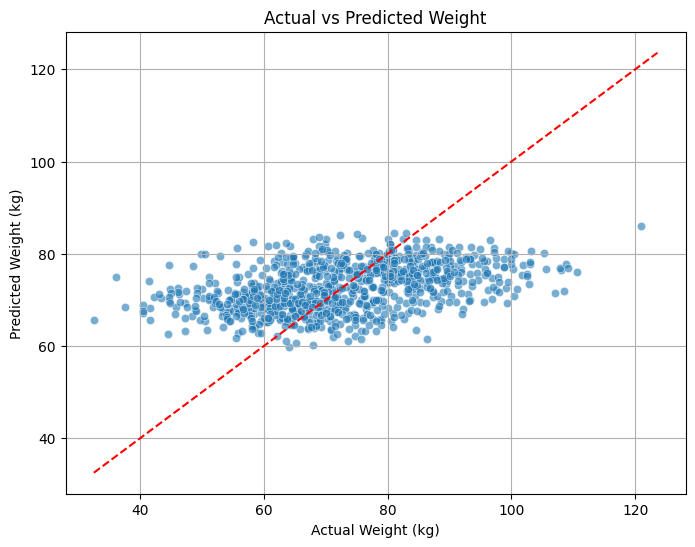

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('Test.csv')

# Select relevant features
features = ['Height (cm)', 'Physical Activity Level', 'Smoking Status']
target = 'Weight (kg)'

df = df[features + [target]]

# Drop missing values
df.dropna(inplace=True)

# Encode categorical features
le_pa = LabelEncoder()
df['Physical_Activity_Encoded'] = le_pa.fit_transform(df['Physical Activity Level'])

le_smoke = LabelEncoder()
df['Smoking_Encoded'] = le_smoke.fit_transform(df['Smoking Status'])

# Define X and y
X = df[['Height (cm)', 'Physical_Activity_Encoded', 'Smoking_Encoded']]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Actual vs Predicted Weight')
plt.grid(True)
plt.show()
